# **<center><span style="color:#fd7b12;">Imports  </span></center>**

In [175]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from pandas_datareader import wb
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
from plotly.subplots import make_subplots

# **<center><span style="color:#fd7b12;">Data Wrangling  </span></center>**

### Importation du dataset

In [176]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [177]:
report = pd.read_csv('/content/drive/MyDrive/ALX-T Udacity/Session 10/notebook/covid_19_clean_complete.csv',parse_dates=['Date'])
report.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


### Création de la variable cas actif

In [178]:
report['Active'] = report['Confirmed'] - report['Deaths'] - report['Recovered']
report.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0


### Remplir les valeurs manquantes

In [179]:
report[['Province/State']] = report[['Province/State']].fillna('')
report.isnull().sum().sum()

0

### Dataset relatif au dernier enregistrement

In [180]:
last_report = report[report['Date'] == max(report['Date'])].reset_index()
last_report.head()

,index,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,26136,,Afghanistan,33.0000,65.0000,2020-04-30,2171,64,260,1847
1,26137,,Albania,41.1533,20.1683,2020-04-30,773,31,470,272
2,26138,,Algeria,28.0339,1.6596,2020-04-30,4006,450,1779,1777
3,26139,,Andorra,42.5063,1.5218,2020-04-30,745,42,468,235
4,26140,,Angola,-11.2027,17.8739,2020-04-30,27,2,7,18


### Dataset relatif au dernier enregistrement/pays

In [181]:
countries_last_report = last_report.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
countries_last_report.head()

,Country/Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,2171,64,260,1847
1,Albania,773,31,470,272
2,Algeria,4006,450,1779,1777
3,Andorra,745,42,468,235
4,Angola,27,2,7,18


In [182]:
patients = pd.read_csv('/content/drive/MyDrive/ALX-T Udacity/Session 10/notebook/COVID19_line_list_data.csv',parse_dates=['exposure_start','exposure_end'])
patients = patients[['country','gender','age','exposure_start','exposure_end','death','recovered','symptom']]
patients.sample(5)

,country,gender,age,exposure_start,exposure_end,death,recovered,symptom
222,France,NaN,NaN,NaT,NaT,0,0,NaN
472,Singapore,NaN,NaN,NaT,2020-01-30,0,2/21/2020,NaN
721,Thailand,NaN,NaN,NaT,NaT,0,0,NaN
1000,Spain,female,36.0,2020-02-12,2020-02-22,0,0,NaN
424,Japan,female,65.0,NaT,NaT,0,0,fever


In [183]:
patients_recovered = patients.query('recovered!="0"')

In [184]:
patients_recovered['cure_time'] = patients_recovered['exposure_end'] - patients_recovered['exposure_start']
patients_recovered.sample(5)

,country,gender,age,exposure_start,exposure_end,death,recovered,symptom,cure_time
512,Singapore,female,54.0,NaT,NaT,0,2/21/2020,NaN,NaT
605,South Korea,female,52.0,NaT,NaT,0,2/28/2020,NaN,NaT
508,Singapore,male,61.0,NaT,NaT,0,2/26/2020,NaN,NaT
462,Singapore,female,73.0,NaT,2020-01-21,0,02/12/20,NaN,NaT
504,Singapore,male,30.0,NaT,NaT,0,2/19/2020,NaN,NaT


In [185]:
patients_deceased = patients.query('death!="0"')
patients_deceased.head()

,country,gender,age,exposure_start,exposure_end,death,recovered,symptom
48,China,male,61.0,NaT,NaT,1,0,NaN
49,China,male,69.0,NaT,NaT,1,0,NaN
50,China,male,89.0,NaT,NaT,1,0,NaN
51,China,male,89.0,NaT,NaT,1,0,NaN
52,China,male,66.0,NaT,NaT,1,0,NaN


In [186]:
patients_deceased['time_to_death'] = patients_deceased['exposure_end'] - patients_deceased['exposure_start']
patients_deceased.sample(5)

,country,gender,age,exposure_start,exposure_end,death,recovered,symptom,time_to_death
111,China,male,58.0,NaT,NaT,1,0,NaN,NaT
596,South Korea,male,57.0,NaT,NaT,2/23/2020,0,NaN,NaT
83,China,male,36.0,NaT,NaT,1,0,NaN,NaT
389,Japan,NaN,NaN,NaT,NaT,2/25/2020,0,cough,NaT
62,China,male,86.0,NaT,NaT,1,0,NaN,NaT


<a id="2"></a>
# **<center><span style="color:#fd7b12;">EDA  </span></center>**

### Quel est le bilan mondial actuel de la COVID ?

In [187]:
report.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0
1,,Albania,41.1533,20.1683,2020-01-22,0,0,0,0
2,,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0
3,,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0
4,,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0


In [188]:
last_report.groupby('Date')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().tail(1).reset_index()

,Date,Confirmed,Deaths,Recovered,Active
0,2020-04-30,3256841,233388,986389,2037064


In [189]:
covid_map = report.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].max()
covid_map = covid_map.reset_index()
covid_map['Date'] = pd.to_datetime(covid_map['Date'])
covid_map['Date'] = covid_map['Date'].dt.strftime('%m/%d/%Y')
covid_map['size'] = covid_map['Confirmed'].pow(0.3)

In [190]:
covid_map.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,size
0,01/22/2020,Afghanistan,0,0,0,0.0
1,01/22/2020,Albania,0,0,0,0.0
2,01/22/2020,Algeria,0,0,0,0.0
3,01/22/2020,Andorra,0,0,0,0.0
4,01/22/2020,Angola,0,0,0,0.0


In [191]:
fig = px.scatter_geo(covid_map, locations="Country/Region", locationmode='country names', 
                     color="Confirmed", size='size', hover_name="Country/Region", 
                     animation_frame="Date", title='Evolution en fonction du temps')
fig.update(layout_coloraxis_showscale=False)
fig.update_geos(
    resolution=110,
    showland=True, landcolor="DarkGrey",
    showocean=True, oceancolor="DimGrey",
    showlakes=True, lakecolor="DimGrey",
    showcountries=True, countrycolor="lightGrey"
)
fig.update_layout(height=700, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Quels sont les 10 Pays qui ont enregistré le plus de cas ?

In [192]:
top10 = (last_report.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False)).head(10).reset_index()
top10

,Country/Region,Confirmed
0,US,1069424
1,Spain,213435
2,Italy,205463
3,United Kingdom,172481
4,France,167299
5,Germany,163009
6,Turkey,120204
7,Russia,106498
8,Iran,94640
9,Brazil,87187


In [193]:
fig = px.bar(top10,x='Country/Region',y='Confirmed',text_auto=True,title='Nombre de cas par pays',color='Confirmed')
fig.update(layout_coloraxis_showscale=False)
fig.show()

### Quels sont les pays qui enregistrent le plus for taux de décès ?

In [194]:
# NOTE: we take into analysis only countries with sufficient statistics (at least 100 confirmed cases)
death_rate = countries_last_report[['Country/Region','Deaths','Confirmed']]

In [195]:
death_rate['Death Rate'] = round((death_rate['Deaths']/death_rate['Confirmed'])*100, 2)
death_rate.head(1)

,Country/Region,Deaths,Confirmed,Death Rate
0,Afghanistan,64,2171,2.95


In [196]:
death_rate = death_rate.query('Confirmed>=10000').head(5)

In [197]:
death_rate.sort_values('Death Rate', ascending=False)

,Country/Region,Deaths,Confirmed,Death Rate
16,Belgium,7594,48519,15.65
23,Brazil,6006,87187,6.89
32,Canada,3310,54457,6.08
9,Austria,584,15452,3.78
15,Belarus,89,14027,0.63


In [216]:
fig = px.pie(death_rate,values='Death Rate',names='Country/Region',labels='Country/Region',title='Taux de décès')
fig.update_traces(textposition='inside', textinfo='value+label')
fig.show()

### Quels sont les pays qui enregistrent le plus fort taux de guérison ?

In [199]:
recovery_rate = countries_last_report[['Country/Region','Recovered','Confirmed']]

In [200]:
recovery_rate['Recovery Rate'] = round((recovery_rate['Recovered']/recovery_rate['Confirmed'])*100, 2)
recovery_rate.head(1)

,Country/Region,Recovered,Confirmed,Recovery Rate
0,Afghanistan,260,2171,11.98


In [201]:
recovery_rate = recovery_rate.query('Confirmed>100').head(5)

In [202]:
recovery_rate.sort_values('Recovery Rate', ascending=False)

,Country/Region,Recovered,Confirmed,Recovery Rate
3,Andorra,468,745,62.82
1,Albania,470,773,60.80
2,Algeria,1779,4006,44.41
6,Argentina,1256,4428,28.36
0,Afghanistan,260,2171,11.98


In [217]:
fig = px.pie(recovery_rate,values='Recovery Rate',names='Country/Region',labels='Country/Region',title='Taux de guérison')
fig.update_traces(textposition='inside', textinfo='value+label')
fig.show()

### Quels est le taux de personnes malade, guérit, décédé par sexe ?

In [204]:
patients_deceased.gender.value_counts()

male      44
female    14
Name: gender, dtype: int64

In [205]:
patients_recovered.gender.value_counts()

male      87
female    66
Name: gender, dtype: int64

In [206]:
patients_deceased.gender.value_counts()

male      44
female    14
Name: gender, dtype: int64

In [218]:
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]])    
fig.add_trace(go.Pie(labels=patients['gender'].value_counts().index, values=patients['gender'].value_counts().values, name="Cas confirmé"),
              1, 1)
fig.update_traces(textposition='inside', textinfo='percent+label')


fig.add_trace(go.Pie(labels=patients_recovered['gender'].value_counts().index, values=patients_recovered['gender'].value_counts().values, name="Cas guéris"),
              1, 2)
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.add_trace(go.Pie(labels=patients_deceased['gender'].value_counts().index, values=patients_deceased['gender'].value_counts().values, name="Cas décédé"),
              1, 3)
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(
    title="Statut des cas par rapport au sexe")

fig.show()

### Quel est le temps de guérison des patients ?

In [208]:
patients_recovered.cure_time.describe().to_frame()

,cure_time
count,19
mean,4 days 02:31:34.736842105
std,3 days 07:09:12.295176430
min,0 days 00:00:00
25%,2 days 00:00:00
50%,4 days 00:00:00
75%,5 days 12:00:00
max,11 days 00:00:00


In [219]:
fig = px.histogram(patients_recovered,x='age',nbins=11,text_auto=True)
fig.show()

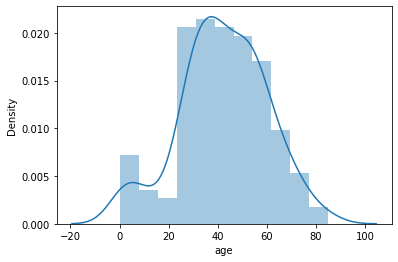

In [210]:
plt.figure()
sns.distplot(patients_recovered.age,bins=11)
plt.show()

### Quels sont les symptomes fréquents du COVID ?

In [211]:
patients['symptom'].value_counts().to_frame().head(10)

,symptom
fever,73
"fever, cough",36
cough,14
"fever, malaise",7
"fever, sore throat",6
"fever, cough, malaise",6
"fever, cough, sore throat",3
"fever, cough, sputum",3
sore throat,3
"cough, shortness of breath",3


In [212]:
wordcloud = WordCloud(background_color="white").generate(' '.join(patients[patients['symptom'].notnull()]['symptom']))

In [213]:
wordcloud

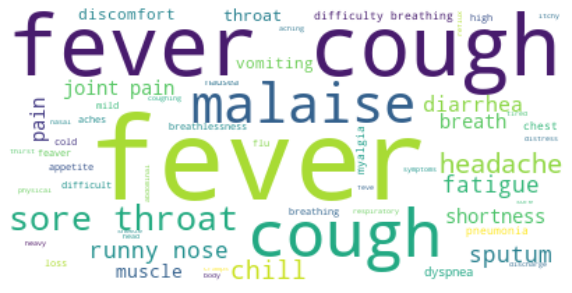

In [214]:

# Display the generated image:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()